In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
air = pd.read_excel(r'C:\Users\local123\Desktop\Ironhack\DAFT_257\module_2\Lab_21_Time-Series-Models\airlines_passengers.xlsx')
air.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
air.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. This will allow it to programmatically pull time values like the year or month for each record. To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [5]:
air['Month'] = pd.to_datetime(air['Month'])
air

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


The next thing we can do is convert the month column to an index.

In [6]:
air.set_index('Month', inplace = True)
air

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

<AxesSubplot:xlabel='Month'>

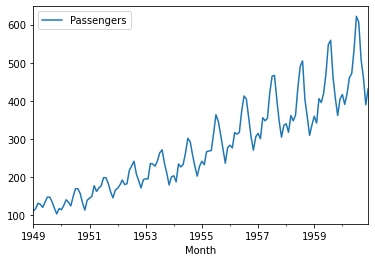

In [7]:
air.plot.line()

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [8]:
from statsmodels.tsa.stattools import adfuller

Let’s pass our data frame into the adfuller method. Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [9]:
# H0: The time series is not stationary.

result = adfuller(air,autolag='AIC')


Store our results in a dataframe display it

In [10]:
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: 0.82
5% Critical Value: -2.88
p-value: 0.99


In [11]:
# the p-value > 0.05, you accept H0 and conclude that the time series is not stationary.

Autocorrelation Checking for autocorrelation in time series data is another important part of the analytic process. This is a measure of how correlated time series data is at a given point in time with past values, which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well. Please calculate and show the autocorrelation

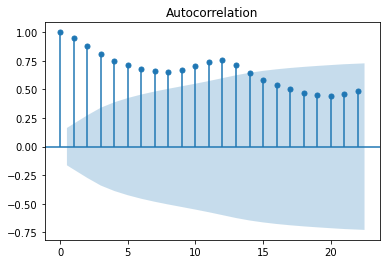

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

# Calculate the ACF (via statsmodel)
plot_acf(air)
# Show the data as a plot (via matplotlib)
plt.show()

Calculate partial autocorrelation

Calculate partial autocorrelation

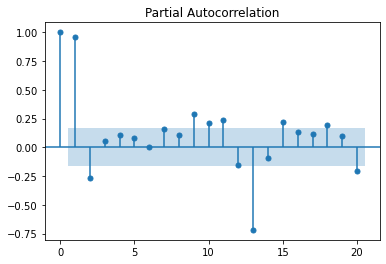

In [14]:


from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_pacf(air, alpha =0.05, lags=20)
plt.show()

Decomposition Trend decomposition is another useful way to visualize the trends in time series data. To proceed, let’s import seasonal_decompose from the statsmodels package: from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

Next, let’s pass our data frame into the seasonal_decompose method and plot the result: decompose = decompose.plot() plt.show()

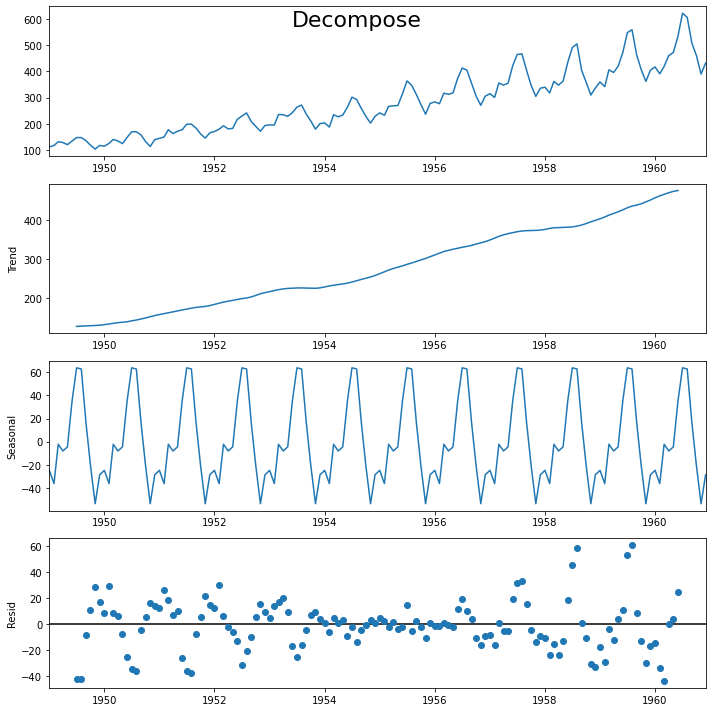

In [16]:
result_mul = seasonal_decompose(air)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Decompose', fontsize=22)

plt.show()

In [17]:
# Trend: there is an increasing value in the series.
# Seasonality: there is an seasonal repeating cycle in the series.
# there are some Noise in the series.

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [18]:
air['Diff'] = air['Passengers'].diff()
result = adfuller(air.Diff.dropna())
print(f'p-value: {result[1]}')

p-value: 0.054213290283824954


In [19]:
air['Log'] = air['Passengers'].apply(np.log)
result = adfuller(air.Log.dropna())
print(f'p-value: {result[1]}')

p-value: 0.4223667747703904


In [20]:
air['Sqrt'] = np.sqrt(air['Passengers']).diff()
result = adfuller(air.Sqrt.dropna())
print(f'p-value: {result[1]}')

# finally, the p-value is under 0.05, time serie is stationary right now

p-value: 0.020784185571267523


In [22]:
# split data into test & train
split_index = round(len(air)*0.7)
train = air['Sqrt'][:split_index]
test = air['Sqrt'][split_index:]

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
from statsmodels.tsa.arima_model import ARMA
#mod = ARMA(air, order=(0, 1))
mod1 = ARMA(train.dropna(), order=(0, 1))
res1 = mod1.fit()

Display the output

In [25]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Sqrt   No. Observations:                  100
Model:                     ARMA(0, 1)   Log Likelihood                -111.105
Method:                       css-mle   S.D. of innovations              0.735
Date:                Thu, 27 Jan 2022   AIC                            228.210
Time:                        00:09:10   BIC                            236.026
Sample:                    02-01-1949   HQIC                           231.373
                         - 05-01-1957                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0834      0.092      0.907      0.364      -0.097       0.264
ma.L1.Sqrt     0.2545      0.119      2.143      0.032       0.022       0.487
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.9288           +0.0000j            3.9288            0.5000
-----------------------------------------------------------------------------
"""

In [28]:
mod2 = ARMA(train.dropna(), order=(0, 2))
res2 = mod2.fit()

In [27]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Sqrt   No. Observations:                  100
Model:                     ARMA(0, 2)   Log Likelihood                -103.338
Method:                       css-mle   S.D. of innovations              0.665
Date:                Thu, 27 Jan 2022   AIC                            214.676
Time:                        00:09:37   BIC                            225.097
Sample:                    02-01-1949   HQIC                           218.893
                         - 05-01-1957                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0798      0.004     19.664      0.000       0.072       0.088
ma.L1.Sqrt    -0.1872      0.066     -2.817      0.005      -0.317      -0.057
ma.L2.Sqrt    -0.8128      0.064    -12.621      0.000      -0.939      -0.687
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.2303           +0.0000j            1.2303            0.5000
-----------------------------------------------------------------------------
"""

In [29]:
mod3 = ARMA(train.dropna(), order=(2, 0))
res3 = mod3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Sqrt   No. Observations:                  100
Model:                     ARMA(2, 0)   Log Likelihood                -110.075
Method:                       css-mle   S.D. of innovations              0.727
Date:                Thu, 27 Jan 2022   AIC                            228.150
Time:                        00:09:51   BIC                            238.570
Sample:                    02-01-1949   HQIC                           232.367
                         - 05-01-1957                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0822      0.074      1.106      0.269      -0.063       0.228
ar.L1.Sqrt     0.2045      0.098      2.088      0.037       0.013       0.396
ar.L2.Sqrt    -0.1845      0.098     -1.891      0.059      -0.376       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5541           -2.2612j            2.3281           -0.2118
AR.2            0.5541           +2.2612j            2.3281            0.2118
-----------------------------------------------------------------------------
"""

In [30]:
mod4 = ARMA(train.dropna(), order=(2, 2))
res4 = mod4.fit()

In [31]:
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Sqrt   No. Observations:                  100
Model:                     ARMA(2, 2)   Log Likelihood                 -98.591
Method:                       css-mle   S.D. of innovations              0.637
Date:                Thu, 27 Jan 2022   AIC                            209.183
Time:                        00:10:09   BIC                            224.814
Sample:                    02-01-1949   HQIC                           215.509
                         - 05-01-1957                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0801      0.006     13.100      0.000       0.068       0.092
ar.L1.Sqrt     0.1839      0.212      0.869      0.385      -0.231       0.599
ar.L2.Sqrt     0.2062      0.190      1.088      0.277      -0.165       0.578
ma.L1.Sqrt    -0.2130      0.174     -1.227      0.220      -0.553       0.127
ma.L2.Sqrt    -0.7870      0.173     -4.554      0.000      -1.126      -0.448
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8008           +0.0000j            1.8008            0.0000
AR.2           -2.6927           +0.0000j            2.6927            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.2707           +0.0000j            1.2707            0.5000
-----------------------------------------------------------------------------
"""

In [32]:
mod5 = ARMA(train.dropna(), order=(2,2,1))
res5 = mod5.fit()

In [33]:
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Sqrt   No. Observations:                  100
Model:                     ARMA(2, 2)   Log Likelihood                 -98.591
Method:                       css-mle   S.D. of innovations              0.637
Date:                Thu, 27 Jan 2022   AIC                            209.183
Time:                        00:10:29   BIC                            224.814
Sample:                    02-01-1949   HQIC                           215.509
                         - 05-01-1957                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0801      0.006     13.100      0.000       0.068       0.092
ar.L1.Sqrt     0.1839      0.212      0.869      0.385      -0.231       0.599
ar.L2.Sqrt     0.2062      0.190      1.088      0.277      -0.165       0.578
ma.L1.Sqrt    -0.2130      0.174     -1.227      0.220      -0.553       0.127
ma.L2.Sqrt    -0.7870      0.173     -4.554      0.000      -1.126      -0.448
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8008           +0.0000j            1.8008            0.0000
AR.2           -2.6927           +0.0000j            2.6927            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.2707           +0.0000j            1.2707            0.5000
-----------------------------------------------------------------------------
"""

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [34]:
p1=res1.predict(test.index[0],test.index[-1])
p2=res2.predict(test.index[0],test.index[-1])
p3=res3.predict(test.index[0],test.index[-1])
p4=res4.predict(test.index[0],test.index[-1])
p5=res5.predict(test.index[0],test.index[-1])

from statsmodels.tools.eval_measures import rmse
r1 = rmse(test,p1)
r2 = rmse(test,p2)
r3 = rmse(test,p3)
r4 = rmse(test,p4)
r5 = rmse(test,p5)
r_list = [r1,r2,r3,r4,r5]
print(r_list)

[1.187537688631834, 1.1937498267124984, 1.187432724913952, 1.186582760764405, 1.186582760764405]


In [35]:
aic_list = [res1.aic,res2.aic,res3.aic,res4.aic,res5.aic]
aic_list

[228.21019732675163,
 214.67598899044464,
 228.14954038404315,
 209.18298665305343,
 209.18298665305343]

In [36]:
df=pd.DataFrame(list(zip(r_list, aic_list)), columns=['rmse', 'aic']).sort_values(by=['aic'])
df

,rmse,aic
3,1.186583,209.182987
4,1.186583,209.182987
1,1.193750,214.675989
2,1.187433,228.149540
0,1.187538,228.210197


In [37]:
#F the 3rd&4th model got the lowerst rmse & aic 
#which is ARMA(2,2) & AR(2)